In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, erlang

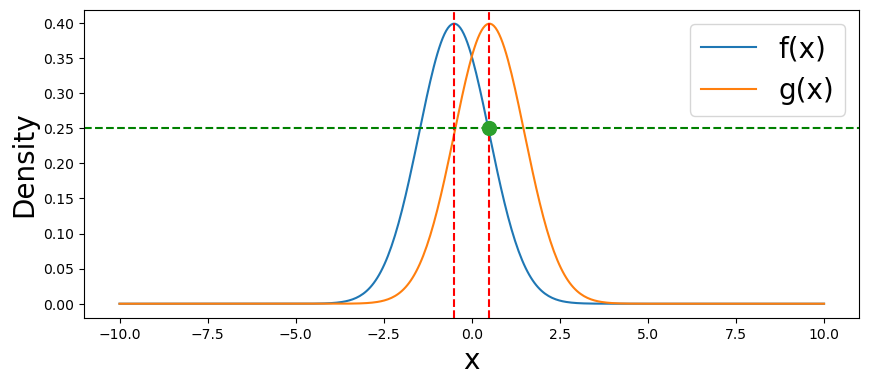

In [25]:
x_vals = np.linspace(-10, 10, 400)
f_vals = norm.pdf(x_vals, loc=-0.5, scale=1)
g_vals = norm.pdf(x_vals, loc=0.5, scale=1)

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, g_vals)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.axvline(x=-0.5, color='red', linestyle='--')
plt.axhline(y=0.25, color='green', linestyle='--')

plt.plot([0.5], [0.25], marker="o", markersize=10)
plt.plot([-0.5], [0.25], marker="o", markersize=10)

plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'g(x)'], fontsize=20)
plt.savefig("proof.png")

In [20]:
#normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

# Erlang
k = 3
lambda_ = 0.5
scale = 1 / lambda_
def f(x):
    return erlang.pdf(x, a=k, scale=scale)

def g(x):
    return norm.pdf(x, loc=10, scale=1)

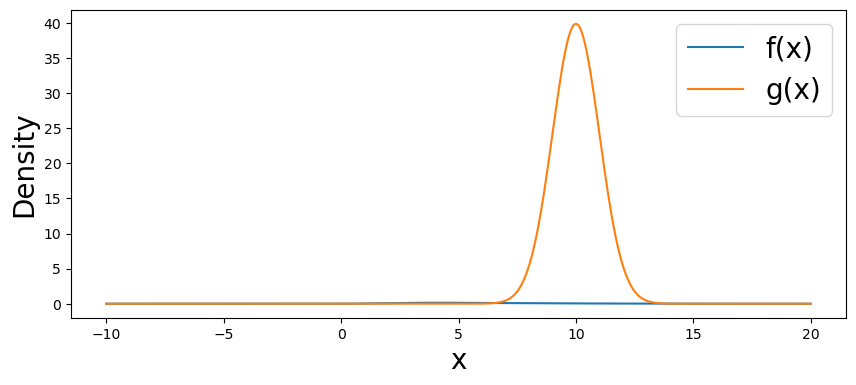

In [27]:
x_vals = np.linspace(-10, 20, 400)
f_vals = erlang.pdf(x_vals, a=k, scale=scale)
f_vals = [f(x) for x in x_vals]
g_vals = [100 * g(x) for x in x_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'g(x)'], fontsize=20)
plt.savefig("second_step.png")

In [15]:
samples = [0]
accepted = True
predefined_samples = [1.5437347713886516, -1.802047900190033]

# First
candidate = predefined_samples[0] #np.random.normal(samples[-1], 4)
prob = min(1, f(candidate) / f(samples[-1]))
if np.random.random() < prob:
    accepted = True
    samples.append(candidate)   
else:
    accepted = False
    samples.append(samples[-1])
print(f"First Sample: Candidate = {candidate}, Probability = {prob}, Accepted = {accepted}")

# Second
candidate = predefined_samples[1] #np.random.normal(samples[-1], 4)
prob = min(1, f(candidate) / f(samples[-1]))
if np.random.random() < prob:
    accepted = True
    samples.append(candidate)   
else:
    accepted = False
    samples.append(samples[-1])
print(f"Second Sample: Candidate = {candidate}, Probability = {prob}, Accepted = {accepted}")


First Sample: Candidate = 1.5437347713886516, Probability = 1, Accepted = True
Second Sample: Candidate = -1.802047900190033, Probability = 0.0, Accepted = False


/var/folders/hj/0g8xmk093_d0chf2nqjgcn7m0000gn/T/ipykernel_93352/609528929.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  prob = min(1, f(candidate) / f(samples[-1]))


In [16]:
N = 100000

for _ in range(N):
    #sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], 4)
    
    #calculate probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1]))
    
    #accept with the calculated probability
    if np.random.random() < prob:
        samples.append(candidate)
        
    #otherwise report current sample again
    else:
        samples.append(samples[-1])

burn_in = 2000
retained_samples = samples[burn_in+1:]


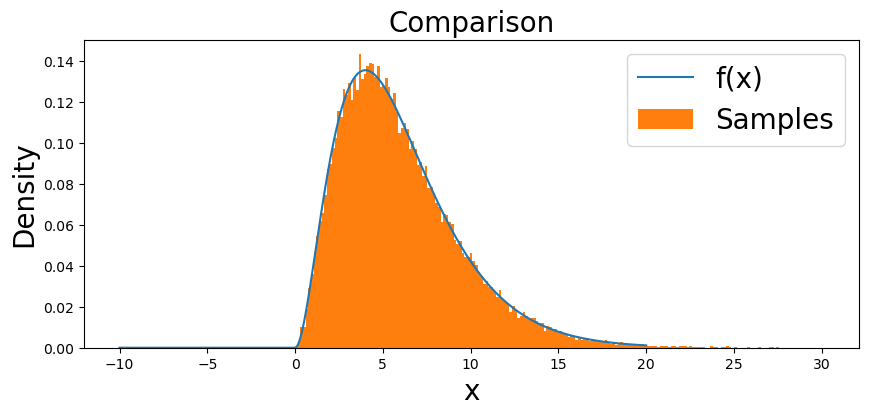

In [28]:
x_vals = np.linspace(-10, 20, 400)
f_vals = erlang.pdf(x_vals, a=k, scale=scale)
f_vals = [f(x) for x in x_vals]
bins = retained_samples


plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Samples'], fontsize=20)

plt.title("Comparison", fontsize=20)
plt.savefig("result.png")